In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf

In [2]:
filename = '../baseline/baseline_v3.4_10yrs.db'
name = os.path.basename(filename).replace('.db','')

In [3]:
bundle_list = []
# The point on the sky we would like to get visits for
ra = [0., 180]
dec = [-40, -40]


In [4]:
metric = maf.metrics.PassMetric(cols=['filter', 'observationStartMJD', 'fiveSigmaDepth', 'visitExposureTime'])
# Select all the visits. Could be something like "filter='r'", "night < 365", etc
sql = 'visitExposureTime > 20'
slicer = maf.slicers.UserPointsSlicer(ra=ra, dec=dec)
bundle_list.append(maf.MetricBundle(metric, slicer, sql, run_name=name))

In [5]:
bd = maf.metricBundles.make_bundles_dict_from_list(bundle_list)
bg = maf.metricBundles.MetricBundleGroup(bd, filename, out_dir='temp', results_db=None)
bg.run_all()


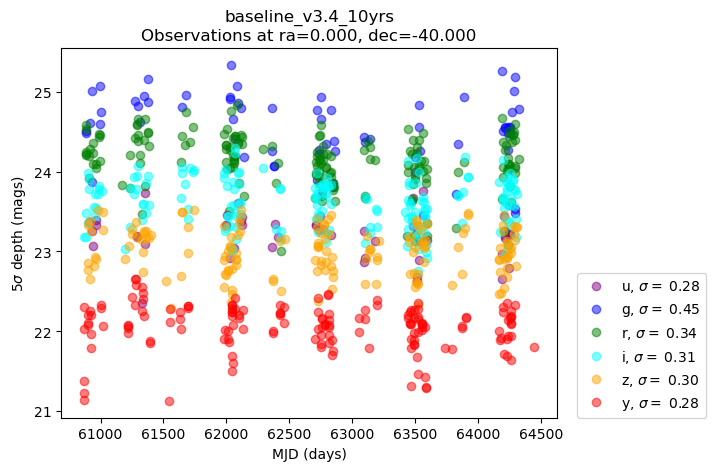

In [6]:
data_slice = bundle_list[0].metric_values[0]

# Let's plot up what the 5-sigma depth looks like
plt.figure()
# Give each filter it's own color
f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
       'i': 'cyan', 'z': 'orange', 'y': 'red'}
for fn in f2c:
    in_filt = np.where(data_slice['filter'] == fn)[0]
    plt.plot(data_slice['observationStartMJD'][in_filt],
             data_slice['fiveSigmaDepth'][in_filt], 'o',
             color=f2c[fn],
             label=fn+r', $\sigma=$ %.2f' % (np.std(data_slice['fiveSigmaDepth'][in_filt])),
             alpha=0.5)
plt.xlabel('MJD (days)')
plt.ylabel(r'5$\sigma$ depth (mags)')
plt.legend(loc=(1.04,0))
plt.title('%s\nObservations at ra=%.3f, dec=%.3f' % (name, ra[0],dec[0]))

t1 = data_slice['observationStartMJD'] + 0

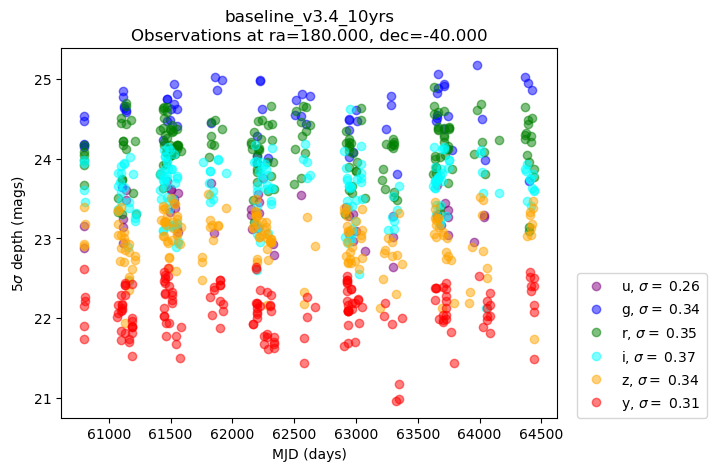

In [7]:
data_slice = bundle_list[0].metric_values[1]

# Let's plot up what the 5-sigma depth looks like
plt.figure()
# Give each filter it's own color
f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
       'i': 'cyan', 'z': 'orange', 'y': 'red'}
for fn in f2c:
    in_filt = np.where(data_slice['filter'] == fn)[0]
    plt.plot(data_slice['observationStartMJD'][in_filt],
             data_slice['fiveSigmaDepth'][in_filt], 'o',
             color=f2c[fn],
             label=fn+r', $\sigma=$ %.2f' % (np.std(data_slice['fiveSigmaDepth'][in_filt])),
             alpha=0.5)
plt.xlabel('MJD (days)')
plt.ylabel(r'5$\sigma$ depth (mags)')
plt.legend(loc=(1.04,0))
plt.title('%s\nObservations at ra=%.3f, dec=%.3f' % (name, ra[1],dec[1]))

t2 = data_slice['observationStartMJD'] + 0

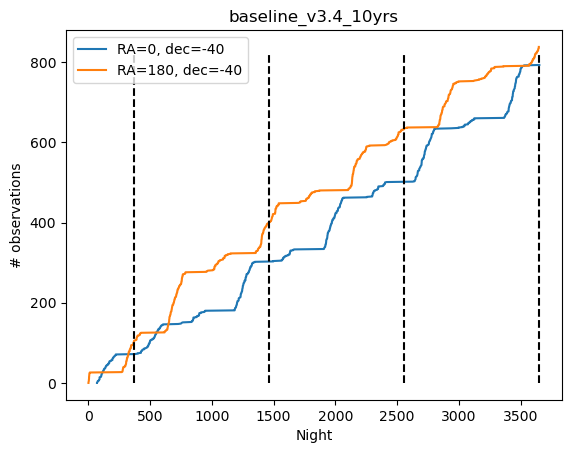

In [11]:
fig, ax = plt.subplots()
t0 = np.min([t1.min(),t2.min()])

ax.plot(np.sort(t1)-t0, np.arange(t1.size), label='RA=%i, dec=%i' % (ra[0], dec[0]))
ax.plot(np.sort(t2)-t0, np.arange(t2.size), label='RA=%i, dec=%i' % (ra[1], dec[1]))

ax.vlines(np.array([1,4,7, 10])*365, 0,825, linestyles='--', colors='k')
ax.set_title(name)
ax.set_xlabel('Night')
ax.set_ylabel('# observations')
legend = ax.legend()